<a href="https://colab.research.google.com/github/Samakande/Project/blob/main/DistanceEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [120]:
arr_train = np.genfromtxt("train.csv", delimiter=",")
arr_test = np.genfromtxt("test.csv", delimiter=",")

arr_train = np.delete(arr_train, 17, axis=1)
arr_test = np.delete(arr_test, 17, axis=1)

In [148]:
model = keras.Sequential()
model.add(tf.keras.Input(shape=(17,)))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'relu'))

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

In [125]:
y1 = np.full((100), 10)
y2 = np.full((100), 20)
y3 = np.full((100), 25)
y4 = np.full((100), 30)
y5 = np.full((100), 35)
y6 = np.full((100), 40)
y7 = np.full((100), 40)
y8 = np.full((100), 45)
y9 = np.full((100), 70)
y10 = np.full((100), 60)

y = np.concatenate((y1,y2,y3,y4,y5,y6,y7,y8,y9,y10))
test_labels = np.full((100),50)

In [156]:
model.fit(arr_train, y, epochs=100, shuffle=True)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1285 - mean_absolute_error: 0.3668
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 2.1552 - mean_absolute_error: 0.3644
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1001 - mean_absolute_error: 0.3442
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 2.0951 - mean_absolute_error: 0.3792
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 2.1145 - mean_absolute_error: 0.3900
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 2.0425 - mean_absolute_error: 0.3181
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 2.0414 - mean_absolute_error: 0.3685
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 2.0257 - mean_absolute_error: 0.3257
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0454 - mean_absolute_error: 0.4348
Epoch 10/1

In [131]:
loss, acc = model.evaluate(arr_test, test_labels, verbose=2)

4/4 - 0s - loss: 0.0306 - mean_absolute_error: 0.1036 - 22ms/epoch - 6ms/step


In [157]:
model.predict(arr_test)

4/4 [==============================] - 0s 3ms/step


array([[49.36754 ],
       [50.32533 ],
       [50.422836],
       [50.270897],
       [50.22288 ],
       [50.193443],
       [50.284687],
       [50.200203],
       [50.34826 ],
       [50.263985],
       [50.24977 ],
       [50.261402],
       [50.24944 ],
       [50.29579 ],
       [50.84633 ],
       [50.44717 ],
       [50.27152 ],
       [50.228104],
       [50.17595 ],
       [49.756866],
       [50.4108  ],
       [50.284096],
       [50.21191 ],
       [49.708523],
       [50.31847 ],
       [50.279842],
       [50.41027 ],
       [50.270504],
       [50.498497],
       [50.301796],
       [50.34464 ],
       [50.292   ],
       [50.06416 ],
       [50.219536],
       [50.351803],
       [50.304733],
       [50.088627],
       [50.268063],
       [50.248055],
       [50.218403],
       [50.19407 ],
       [50.30738 ],
       [50.39394 ],
       [49.81547 ],
       [50.315166],
       [50.927647],
       [50.270172],
       [50.415478],
       [50.182484],
       [49.683613],


In [133]:
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
fb_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()

tf.lite.experimental.Analyzer.analyze(model_content=fb_model)

In [141]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [143]:
print(arr_test[0])

[53.13       49.37       49.34       49.41       49.46       49.51
 49.39       49.32       49.65       49.54       49.51       49.5
 49.37       49.34       49.48       18.28957031 57.51710703]


In [150]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                180       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


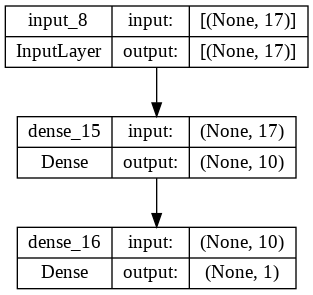

In [154]:
tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names= True,
                          rankdir = 'TB', expand_nested = False, dpi = 96)